<a href="https://colab.research.google.com/github/maggiecope/comp351-ai-project/blob/main/RebeccaANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from google.colab import files

In [74]:

# Upload the CSV file
file_path = "WaitTimes.csv"

# Load the data
df = pd.read_csv("WaitTimes.csv")

print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nColumn names:")
print(df.columns.tolist())
print("\nData types:")
print(df.dtypes)
print("\nMissing values:")
print(df.isnull().sum())

# Data Preprocessing
print("DATA PREPROCESSING")

# Handle missing values
df = df.dropna()

Dataset shape: (17593, 26)

First few rows:
              Land                                  Ride  Wait Time  \
0       Pixar Pier               Toy Story Midway Mania!         40   
1        Cars Land           Mater's Graveyard JamBOOree         30   
2   Hollywood Land                 Mickey's PhilharMagic         10   
3       Pixar Pier                     Jumpin' Jellyfish         20   
4  Avengers Campus  WEB SLINGERS: A Spider-Man Adventure         45   

            Local Time Day of Week        Date  tempmax  tempmin  temp  \
0  2024-09-23 17:30:04      Monday  2024-09-23     78.4     62.4  67.9   
1  2024-09-23 17:45:03      Monday  2024-09-23     78.4     62.4  67.9   
2  2024-09-23 17:45:03      Monday  2024-09-23     78.4     62.4  67.9   
3  2024-09-23 17:45:03      Monday  2024-09-23     78.4     62.4  67.9   
4  2024-09-23 18:00:04      Monday  2024-09-23     78.4     62.4  67.9   

   humidity  ...  visibility  solarradiation  solarenergy  uvindex  \
0      80.5  .

In [75]:
# Split features and target
X = df.drop('Wait Time', axis=1)
y = df['Wait Time']

print(f"\nTarget column: {y}")
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")


Target column: 0        40
1        30
2        10
3        20
4        45
         ..
17588     5
17589    30
17590     5
17591    10
17592    85
Name: Wait Time, Length: 17593, dtype: int64
Features shape: (17593, 25)
Target shape: (17593,)


In [76]:
# Encode categorical variables
# Categorical columns: Land, Ride, Local Time, Day of Week, Date, sunrise, sunset, conditions, description
categorical_columns = X.select_dtypes(include=['object']).columns
label_encoders = {}

print(f"\nCategorical columns to encode: {list(categorical_columns)}")

for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le
    print(f"  - Encoded '{col}': {len(le.classes_)} unique values")

print(f"\nTotal encoded columns: {len(categorical_columns)}")

# Convert all columns to numeric to ensure compatibility
X = X.apply(pd.to_numeric, errors='coerce')

# Check for any remaining non-numeric values
print(f"\nData types after encoding:")
print(X.dtypes)

# Handle any NaN values that might have been created during conversion
if X.isnull().sum().sum() > 0:
    print(f"\nFilling {X.isnull().sum().sum()} missing values with median...")
    X = X.fillna(X.median())


Categorical columns to encode: ['Land', 'Ride', 'Local Time', 'Day of Week', 'Date', 'sunrise', 'sunset', 'conditions', 'description']
  - Encoded 'Land': 7 unique values
  - Encoded 'Ride': 22 unique values
  - Encoded 'Local Time': 1745 unique values
  - Encoded 'Day of Week': 7 unique values
  - Encoded 'Date': 32 unique values
  - Encoded 'sunrise': 32 unique values
  - Encoded 'sunset': 32 unique values
  - Encoded 'conditions': 3 unique values
  - Encoded 'description': 5 unique values

Total encoded columns: 9

Data types after encoding:
Land                  int64
Ride                  int64
Local Time            int64
Day of Week           int64
Date                  int64
tempmax             float64
tempmin             float64
temp                float64
humidity            float64
precip                int64
windgust            float64
windspeed           float64
winddir             float64
sealevelpressure    float64
cloudcover          float64
visibility          float64


In [77]:
# Split the data
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 14074
Test set size: 3519


In [78]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [79]:
# Build the Neural Network
print("BUILDING NEURAL NETWORK")

model = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

print("\nModel Architecture:")
model.summary()


BUILDING NEURAL NETWORK

Model Architecture:


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 128)            │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,209 (55.50 KB)

 Trainable params: 14,209 (55.50 KB)

 Non-trainable params: 0 (0.00 B)

In [80]:
# Train the model
print("TRAINING MODEL")


early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)

history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

TRAINING MODEL
Epoch 1/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 621.0055 - mae: 18.1536 - val_loss: 369.9176 - val_mae: 14.6680
Epoch 2/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 405.6107 - mae: 15.5188 - val_loss: 348.0031 - val_mae: 14.4900
Epoch 3/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 399.6627 - mae: 15.3520 - val_loss: 351.6628 - val_mae: 14.2791
Epoch 4/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 384.3942 - mae: 15.1581 - val_loss: 340.9814 - val_mae: 14.9264
Epoch 5/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 386.2318 - mae: 15.1612 - val_loss: 343.5719 - val_mae: 14.0025
Epoch 6/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 371.6410 - mae: 14.7091 - val_loss: 325.0440 - val_mae: 14.1171
Epoch 7/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 359.4557 - mae: 14.5678 - val_loss: 329.2441 - val_mae: 14.0194
Epoch 8/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 362.7321 - mae: 14.6036 - val_loss: 333.8355 - va

In [81]:
y_pred = model.predict(X_test_scaled).flatten()

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nTest Set Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f} minutes")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} minutes")
print(f"R² Score: {r2:.4f}")

110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Test Set Performance:
Mean Absolute Error (MAE): 9.34 minutes
Root Mean Squared Error (RMSE): 13.32 minutes
R² Score: 0.6453


In [82]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

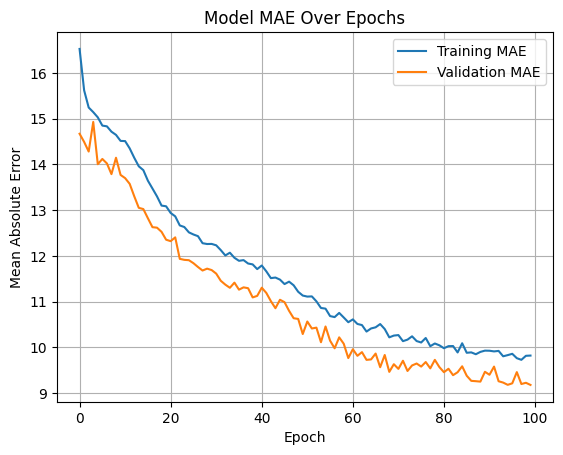

In [83]:
# Plot training & validation accuracy values
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE Over Epochs')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

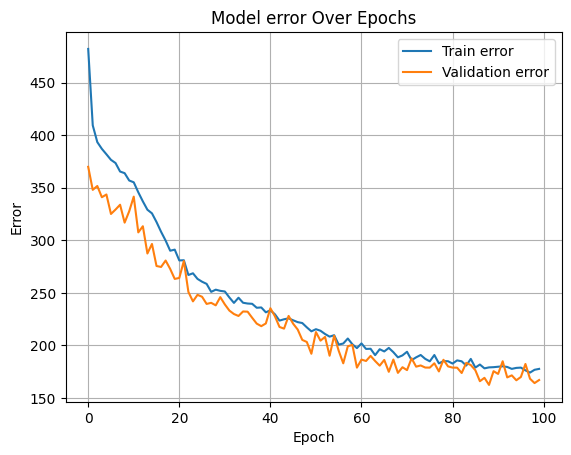

In [84]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'], label='Train error')
plt.plot(history.history['val_loss'], label='Validation error')
plt.title('Model error Over Epochs')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()